In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
import numpy as np
import datetime

import glob
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
lat_min=45
lon_min=-60
lat_max=60
lon_max=10

In [3]:
lon_recovery=-9.8875
lat_recover=53.5384
osker_id=300434066644040

lon_recovery_2=-9.444734
lat_recover_2=52.858339

In [4]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [5]:
#stokes = glob.glob('data/stokes_*')
#SVPs = glob.glob('data/SVP_*')
spotter = 'data/SPOT-1759_2022-04-22_2023-10-25_download.csv'
#oskers = 'data/OSKERS-SpringAZMP2022-20220526.csv'

In [6]:
def pretty_map(ax):
    # Add coastlines
    ax.coastlines(linewidth=1)
    # Add gridlines 
    gl = ax.gridlines(linestyle='--',draw_labels={"bottom": "x", "left": "y"},zorder=10)
    ax.add_feature(cfeature.LAND)

In [7]:
def plot_bathymetry(ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-1000,]
    CS = ax.contour(lons,lats,bathy,levels, transform=ccrs.PlateCarree(),
                    linestyles='solid', linewidth=0.05,colors='lightgrey')

In [8]:
def plot_spotter(fname, ax):
    d = pd.read_csv(fname, na_values='-')
    x, y = d['Longitude (deg)'].values, d['Latitude (deg)'].values
    ax.plot(x,y,color='C0', label='SPOT-1759', transform=ccrs.PlateCarree()) 
    ax.plot(x[-1],y[-1],'go', label='__nolabel', transform=ccrs.PlateCarree()) 
    ax.plot(x[0],y[0],'ro', label='__nolabel', transform=ccrs.PlateCarree()) 

In [9]:
def plot_oskers(files, ax, idplot=None):
    count=0
    for file in files:
        print(file)
        d = pd.read_csv(file)
        dg = d.groupby('Device')
        for name, g in dg:
            x, y = g['Longitude'].values,g['Latitude'].values
            if idplot:
                if name==idplot:
                    ax.plot(x,y,color='C2', lw=5,label='Osker 1319', transform=ccrs.PlateCarree())

/tmp/ipykernel_2428247/570656967.py:4: DtypeWarning: Columns (381) have mixed types.Specify dtype option on import or set low_memory=False.
  plot_spotter(spotter, ax)
/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (381) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


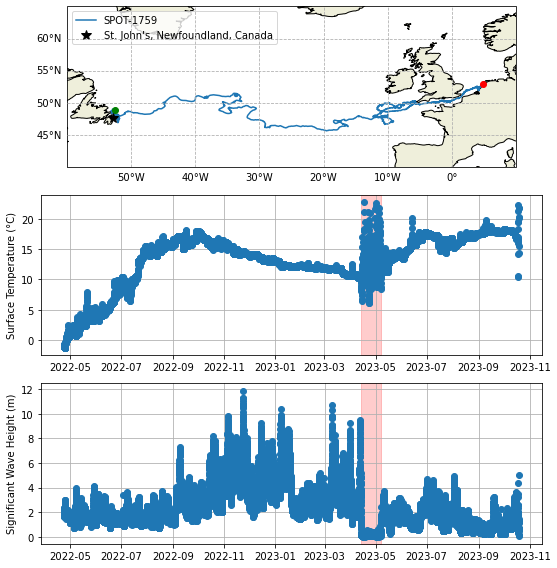

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
#plot_bathymetry(bmap,ax,esel)
plot_spotter(spotter, ax)
#plot_oskers([oskers,], ax,idplot=osker_id)
ax.plot(-52.7126,47.5615,'k*',ms=10,label="St. John's, Newfoundland, Canada")
#ax.plot(lon_recovery, lat_recover,'rs',ms=10,label="Approximate recovery location of Osker 1319")
#ax.plot(lon_recovery_2, lat_recover_2,'ys',ms=5,label="Approximate recovery location of Osker 1119")
ax.set_xlim([-60,lon_max])
ax.set_ylim([40,65])
pretty_map(ax)
ax.legend( loc=2)
## Add temperatire and waves for itnerest
# grounding on Isle Scilly
start = datetime.datetime(2023, 4, 13)
end = datetime.datetime(2023, 5, 7)
d = pd.read_csv(spotter, na_values='-', parse_dates=[-1])
time = d['Time'].values[::-1]
ax = fig.add_subplot(3, 1, 2)
temp = pd.to_numeric(d['Surface Temperature (°C)']).values[::-1]
ax.plot(time, temp, 'o')
# add box
ylim = ax.get_ylim()
ax.fill_betweenx(ylim,x1=start,x2=end,alpha=0.2,color='r')
ax.set_ylabel('Surface Temperature (°C)')
ax.set_ylim(ylim)
ax.grid()
# waves
ax = fig.add_subplot(3, 1, 3)
wave = pd.to_numeric(d['Significant Wave Height (m)']).values[::-1]
ax.plot(time, wave, 'o')
ylim = ax.get_ylim()
ax.fill_betweenx(ylim,x1=start,x2=end,alpha=0.2,color='r')
ax.set_ylim(ylim)
ax.set_ylabel('Significant Wave Height (m)')
ax.grid()
plt.tight_layout()

In [11]:
fig.savefig('spot-1759-recovery.png', bbox_inches='tight',dpi=300)